In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-diabities/diabetes.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/predict-diabities/diabetes.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.loc[df['Age'] <40, 'Category'] = 'Adults'
df.loc[df['Age'] >65, 'Category'] = 'Old'

In [6]:
df['Category']=df['Category'].fillna('Mid-age')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Category
0,6,148,72,35,0,33.6,0.627,50,1,Mid-age
1,1,85,66,29,0,26.6,0.351,31,0,Adults
2,8,183,64,0,0,23.3,0.672,32,1,Adults
3,1,89,66,23,94,28.1,0.167,21,0,Adults
4,0,137,40,35,168,43.1,2.288,33,1,Adults


In [8]:
df1=df['Outcome']==1

In [9]:
df1=df[df1]

In [10]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Category
0,6,148,72,35,0,33.6,0.627,50,1,Mid-age
2,8,183,64,0,0,23.3,0.672,32,1,Adults
4,0,137,40,35,168,43.1,2.288,33,1,Adults
6,3,78,50,32,88,31.0,0.248,26,1,Adults
8,2,197,70,45,543,30.5,0.158,53,1,Mid-age
...,...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1,Adults
757,0,123,72,0,0,36.3,0.258,52,1,Mid-age
759,6,190,92,0,0,35.5,0.278,66,1,Old
761,9,170,74,31,0,44.0,0.403,43,1,Mid-age


In [11]:
df1=df1[['Category','Outcome']]

In [12]:
df1=df1.groupby('Category').count()

<AxesSubplot:title={'center':'Number of diabetes per Age'}, xlabel='Category'>

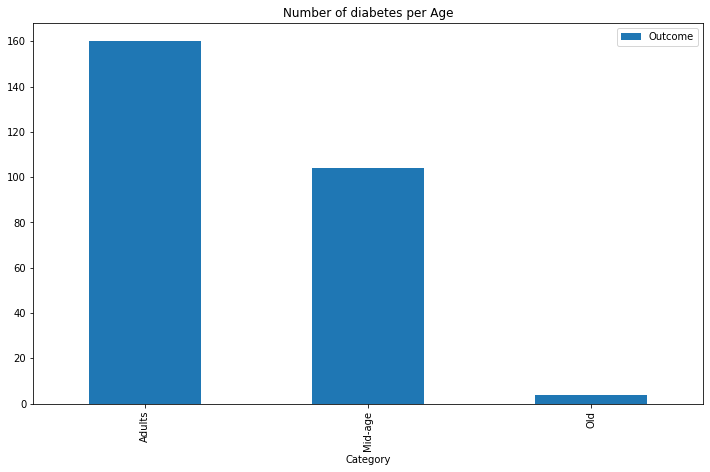

In [13]:
df1.plot(kind='bar',figsize=(12,7),title='Number of diabetes per Age')

**Adults category has the highest number of diabetes**

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

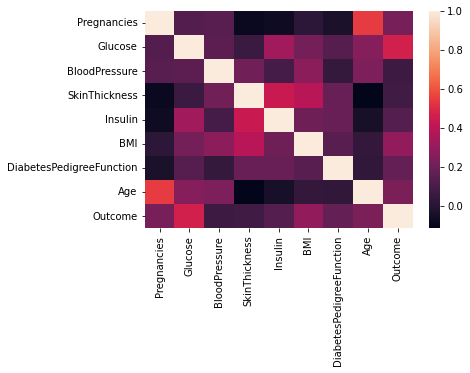

In [15]:
sns.heatmap(df.corr())

**From the chart above, we can see that all the features has an impact on the Outcome.**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Category                  768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


**Spliting the dataset:**

In [18]:
X= df.values[:,0:8]
Y=  df.values[:,8]

In [19]:
Y=Y.astype('int')
X=X.astype('int')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 100)

In [21]:
logreg = LogisticRegression(max_iter=200)

In [22]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [23]:
y_pred = logreg.predict(X_test)


In [24]:
clf2= RandomForestClassifier(n_estimators = 100)

In [25]:
clf2.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
y_pred2 = clf2.predict(X_test)

In [27]:
 clf1 = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=7, min_samples_leaf=5)

In [28]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=100)

In [29]:
y_pred3 = clf1.predict(X_test)

**Logistic regression report:**

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        47
           1       0.76      0.63      0.69        30

    accuracy                           0.78        77
   macro avg       0.77      0.75      0.76        77
weighted avg       0.78      0.78      0.77        77



**Random Forest report:**

In [31]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        47
           1       0.70      0.53      0.60        30

    accuracy                           0.73        77
   macro avg       0.72      0.69      0.70        77
weighted avg       0.72      0.73      0.72        77



**Decision tree report:**

In [32]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        47
           1       0.67      0.53      0.59        30

    accuracy                           0.71        77
   macro avg       0.70      0.68      0.69        77
weighted avg       0.71      0.71      0.71        77



**We can see that Logistic regression algorithm has the best score, but other algorithms should be tested to improve the result. Thank you!**